In [9]:
from pathlib import Path
import pandas as pd
from pandas import DataFrame, MultiIndex, merge, read_csv, concat


from utils.data import get_dataframe, remove_warmup_df
from utils.global_config import (
    N_WARMUPS,
    SERIES,
    TSTEPS,
    DATA_DIR,
    TEST_FILE,
    METRIC_CSV_FILE,
)
from utils.post_processing import METRIC, DSET, TGT, VAL

# from utils.errors_computing import compute_errors_df

# from utils.errors_computing_train import compute_errors_df_omg_so_ugly

In [20]:
STDY = "study"

pd.options.display.float_format = "{:#.3g}".format


def summarize_df(list_dir: list[str]) -> DataFrame:

    df = DataFrame()
    for resdir in list_dir:
        dft = read_csv(resdir + "/" + METRIC_CSV_FILE, index_col=0)
        dft[STDY] = resdir
        df = concat([df, dft])

    df = df.pivot(index=[METRIC, STDY], columns=[DSET, TGT], values=[VAL])
    idx = df.index
    df = df.reindex(list_dir, level = 1)
    display(df)
    print("\n\n======\n\n")
    return df


hlp = summarize_df(["SF_FE", "AF_FE"])  # METRIC,

value                                        
dataset                     train                test                    
target                    y_fixed y_fixed_obs y_fixed y_fixed_obs     NaN
metric              study                                                
mean_absolute_error SF_FE  0.0413       0.799  0.0388       0.793     NaN
                    AF_FE   0.138       0.796   0.187       0.820     NaN
mean_squared_error  SF_FE 0.00458        1.00 0.00327       0.988     NaN
                    AF_FE  0.0350       0.995  0.0744        1.06     NaN
quad-bias           SF_FE     NaN         NaN 0.00186       0.987     NaN
                    AF_FE     NaN         NaN  0.0316        1.01     NaN
variance            SF_FE     NaN         NaN     NaN         NaN 0.00142
                    AF_FE     NaN         NaN     NaN         NaN  0.0433

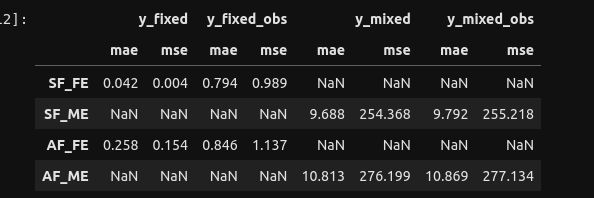

In [21]:
summarize_df(["SF_ME", "AF_ME", "SF_ME_y", "AF_ME_y"])  # METRIC,

value                                       
dataset                       train                test                   
target                      y_mixed y_mixed_obs y_mixed y_mixed_obs    NaN
metric              study                                                 
mean_absolute_error SF_ME      10.4        10.5    9.68        9.79    NaN
                    AF_ME      11.3        11.3    10.7        10.8    NaN
                    SF_ME_y   0.555       0.974   0.574       0.984    NaN
                    AF_ME_y   0.607        1.01   0.630        1.02    NaN
mean_squared_error  SF_ME      289.        290.    254.        255.    NaN
                    AF_ME      297.        298.    274.        275.    NaN
                    SF_ME_y   0.515        1.51   0.567        1.56    NaN
                    AF_ME_y   0.614        1.61   0.673        1.67    NaN
quad-bias           SF_ME       NaN         NaN    251.        252.    NaN
                    AF_ME       NaN         NaN    267.        268.    NaN
                    SF_ME_y     NaN         NaN   0.532        1.53    NaN
                    AF_ME_y     NaN         NaN   0.636        1.63    NaN
variance            SF_ME       NaN         NaN     NaN         NaN   3.30
                    AF_ME       NaN         NaN     NaN         NaN   6.88
                    SF_ME_y     NaN         NaN     NaN         NaN 0.0352
                    AF_ME_y     NaN         NaN     NaN         NaN 0.0366

value                                       
dataset                       train                test                   
target                      y_mixed y_mixed_obs y_mixed y_mixed_obs    NaN
metric              study                                                 
mean_absolute_error SF_ME      10.4        10.5    9.68        9.79    NaN
                    AF_ME      11.3        11.3    10.7        10.8    NaN
                    SF_ME_y   0.555       0.974   0.574       0.984    NaN
                    AF_ME_y   0.607        1.01   0.630        1.02    NaN
mean_squared_error  SF_ME      289.        290.    254.        255.    NaN
                    AF_ME      297.        298.    274.        275.    NaN
                    SF_ME_y   0.515        1.51   0.567        1.56    NaN
                    AF_ME_y   0.614        1.61   0.673        1.67    NaN
quad-bias           SF_ME       NaN         NaN    251.        252.    NaN
                    AF_ME       NaN         NaN    267.        268.    NaN
                    SF_ME_y     NaN         NaN   0.532        1.53    NaN
                    AF_ME_y     NaN         NaN   0.636        1.63    NaN
variance            SF_ME       NaN         NaN     NaN         NaN   3.30
                    AF_ME       NaN         NaN     NaN         NaN   6.88
                    SF_ME_y     NaN         NaN     NaN         NaN 0.0352
                    AF_ME_y     NaN         NaN     NaN         NaN 0.0366

# Reformater

In [7]:
pd.options.display.float_format = "{:#5.3g}".format
df = pd.read_csv("/home/francois/Téléchargements/table.csv", header=[0, 1])
df

,Unnamed: 0_level_0,train set,Unnamed: 2_level_0,test set,Unnamed: 4_level_0
,Model,without noise,with noise,without noise,with noise
0,Oracle (marg),280.,281.,246.,247.
1,Linear mixed (marg),376.,377.,315.,316.
2,t-polynomial (marg),464.,465.,373.,373.
3,ODE RNN,310.,263.,296.,297.
4,RNN,298.,254.,289.,290.
5,Mixed Reservoir* (marg.),NaN,NaN,170.,172.
6,Oracle (ss),0.0850,0.915,0.0840,0.908
7,Linear mixed (subject specific),0.162,0.894,0.162,0.884
8,t-polynomial (subject specific),8.22,9.07,8.29,9.05


In [10]:
df.to_latex()

'\\begin{tabular}{llrrrr}\n\\toprule\n & Unnamed: 0_level_0 & train set & Unnamed: 2_level_0 & test set & Unnamed: 4_level_0 \\\\\n & Model & without noise & with noise & without noise & with noise \\\\\n\\midrule\n0 & Oracle (marg) & 279.856000 & 280.803000 & 245.712000 & 246.598000 \\\\\n1 & Linear mixed (marg) & 375.664000 & 376.581000 & 315.035000 & 316.067000 \\\\\n2 & t-polynomial (marg) & 463.831000 & 464.751000 & 372.615000 & 373.340000 \\\\\n3 & ODE RNN & 309.716000 & 262.709000 & 296.221000 & 297.136000 \\\\\n4 & RNN & 297.875000 & 254.463000 & 289.292000 & 290.100000 \\\\\n5 & Mixed Reservoir* (marg.) & NaN & NaN & 169.700000 & 172.200000 \\\\\n6 & Oracle (ss) & 0.085000 & 0.915000 & 0.084000 & 0.908000 \\\\\n7 & Linear mixed (subject specific) & 0.162000 & 0.894000 & 0.162000 & 0.884000 \\\\\n8 & t-polynomial (subject specific) & 8.225000 & 9.067000 & 8.285000 & 9.055000 \\\\\n9 & VAE & 0.350000 & NaN & 1.670000 & NaN \\\\\n10 & VAE (noisy covariates) & 0.380000 & NaN & 1.8